In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [2]:
from helpers import load_data

path_dataset = "../Data/data_train.csv"
ratings = load_data(path_dataset).T
print("Real number of items: {}, Real number of users: {}.".format(
        ratings.shape[0],ratings.shape[1]))

number of items: 10000, number of users: 1000
Real number of items: 1000, Real number of users: 10000.


### Plot the number of ratings per movie and user

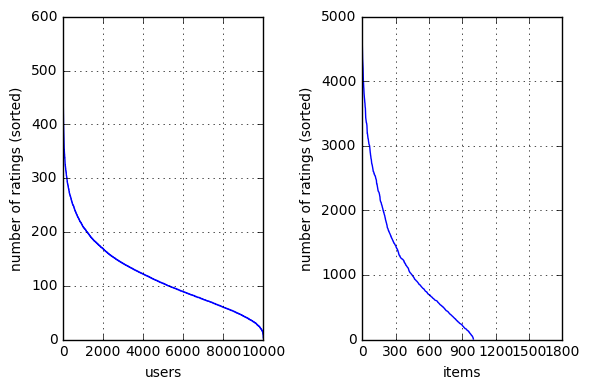

min # of items per user = 3, min # of users per item = 8.


In [3]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

### Split the data into a train and test set

## Implementation

#### Matrix initialization

#### Error

### Baseline Mean

#### Use the global mean to do the prediction

#### Use the user means as the prediction

#### Use the item means as the prediction

### Learn the Matrix Factorization using SGD

### Learn the Matrix Factorization using Alternating Least Squares

### Post processing

## Script

In [17]:
min_num_ratings = 20
from plots import plot_train_test_data
valid_ratings, train, test, valid_users, valid_items, train_full, test_full = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings, p_test = 0.1)


Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1058411
Total number of nonzero elements in test data:116778


In [18]:
#matrix_factorization_SGD(train, test)   
num_features = 20

In [19]:
num_features = 20
predicted_user_features, predicted_item_features = ALS(train, test,0.09,0.09,num_features)

RMSE on train data: 1.0123229539614707
RMSE on train data: 0.941286910719371
RMSE on train data: 0.9008065159680153
RMSE on train data: 0.8785608484771651
RMSE on train data: 0.8650180445081458
RMSE on train data: 0.8561514363575061
RMSE on train data: 0.8500280416661308
RMSE on train data: 0.8456158363504067
RMSE on train data: 0.8423288145555562
RMSE on train data: 0.839814025123937
RMSE on train data: 0.837847450925837
RMSE on train data: 0.8362808195004808
RMSE on train data: 0.8350127671264916
RMSE on train data: 0.8339722039124107
RMSE on train data: 0.8331081810503004
Converged

RMSE on test data: 0.9871576372565611.


In [20]:
lambda_user = 0.09
lambda_item = 0.09
post_processing_iterations=10
full_user_features, full_item_features = constuct_full_features(predicted_user_features, predicted_item_features,
                                                                valid_users, valid_items, min_num_ratings, train_full,test_full,
                                                                lambda_user, lambda_item, post_processing_iterations )
print (np.mean(predicted_item_features.T @ predicted_user_features))

RMSE on test data before computation: 0.8488159920962333.
RMSE on test data after computations: 0.8488209845518064.
3.37200316902


##### Finding good values of min_number_of_ratings


In [17]:


full_item_features_array,full_user_features_array,rmse_test_full=find_min_num_ratings([18,20,22,24,26],
                                                                                      ratings,num_items_per_user,
                                                                                      num_users_per_item,0.1,
                                                                                      0.09,0.09)                          

Minimum number of ratings : 18
Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059062
Total number of nonzero elements in test data:116855
RMSE on train data: 1.0275703951455855
RMSE on train data: 1.002616008914626
RMSE on train data: 0.9724512588963747
RMSE on train data: 0.9502767764866777
RMSE on train data: 0.9379764669503742
RMSE on train data: 0.9302959557753421
RMSE on train data: 0.9250920052077818
RMSE on train data: 0.9213738340184134
RMSE on train data: 0.9186083937912698
RMSE on train data: 0.9164825690236603
RMSE on train data: 0.9148034497885065
RMSE on train data: 0.9134476203401098
RMSE on train data: 0.912333103080816
RMSE on train data: 0.9114034485572489
Converged

RMSE on test data: 0.9914562771858555.
RMSE on test data before computation: 0.9207962307801545.
RMSE on test data after computations: 0.9207792806259754.
Minimum number of ratings : 20
Total number of nonzero elements in origial data:1176952
Total 

In [19]:
print(rmse_test_full)
full_item_features=full_item_features_array[4]
full_user_features=full_user_features_array[4]
full_item_features,full_user_features

[0.92077928062597536, 0.9181509131586667, 0.92030928938383783, 0.9187788369093921, 0.9218612255358557]


(array([[ 1.95901928,  2.05085744,  2.00509539, ...,  1.88847254,
          1.93165581,  2.14963776],
        [-0.22468463, -0.1257687 ,  0.21936052, ..., -0.27266628,
          0.03830921, -0.19781777],
        [-0.06511701,  0.01436947,  0.05794149, ...,  0.11098845,
          0.0270248 , -0.4233618 ],
        ..., 
        [-0.08105859, -0.35862938,  0.04844548, ...,  0.01156607,
          0.02819801,  0.05559173],
        [ 0.09338061, -0.07048183,  0.30735055, ...,  0.21652131,
         -0.26658885, -0.2130145 ],
        [-0.22367193,  0.07923198, -0.25887485, ..., -0.20741435,
         -0.57437103, -0.09198887]]),
 array([[ 1.65082124,  1.59332788,  1.4430021 , ...,  1.50057014,
          1.57235405,  1.6408498 ],
        [-0.19030962, -0.31980173, -0.13752098, ...,  0.12502074,
         -0.1881956 , -0.02927695],
        [ 0.3133976 ,  0.12169049,  0.14939107, ..., -0.23988742,
          0.32466856,  0.43765358],
        ..., 
        [-0.10725995, -0.08027574, -0.18958596, ...,

##### Finding a good num_features

In [19]:

num_features_array=[1,5,10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,240,280,320,360,400]
rmse_train_array,rmse_test_array,item_features_array,user_features_array=finding_num_features(train,test,num_features_array)

predicting for 1 of features
RMSE on train data: 1.0420296046598985
RMSE on train data: 1.029117171096363
RMSE on train data: 1.0207697795652935
RMSE on train data: 1.0150503910110167
RMSE on train data: 1.0109595086282284
RMSE on train data: 1.0079326622336042
RMSE on train data: 1.0056309492433728
RMSE on train data: 1.0038407229029704
RMSE on train data: 1.0024217896335308
RMSE on train data: 1.001279012517712
RMSE on train data: 1.0003459582994323
Converged

RMSE on test data: 1.0084663155993472.
predicting for 5 of features
RMSE on train data: 1.0391151768323106
RMSE on train data: 1.0232674855368262
RMSE on train data: 1.0073455596630938
RMSE on train data: 0.9929835214250139
RMSE on train data: 0.9841977190304327
RMSE on train data: 0.9782454836917219
RMSE on train data: 0.9737490657459078
RMSE on train data: 0.9702759405636799
RMSE on train data: 0.9676878952899903
RMSE on train data: 0.965811500012759
RMSE on train data: 0.9644393265942872
RMSE on train data: 0.963405812493181

In [23]:
list(zip(num_features_array,rmse_train_array))

[(1, 1.0003459582994323),
 (5, 0.96260113215913212),
 (10, 0.94078749032698938),
 (20, 0.9119783292659871),
 (30, 0.89185601775004153),
 (40, 0.87748669777625299),
 (50, 0.86609124596293119),
 (60, 0.8579073786125222),
 (70, 0.8516721032596668),
 (80, 0.84665131331796395),
 (90, 0.84301812941872201),
 (100, 0.84017477417456621),
 (120, 0.83654547494099918),
 (140, 0.83525517926337545),
 (160, 0.83395349853987533),
 (180, 0.83310818105030049),
 (200, 0.83335837936764556),
 (240, 0.83271865128311762),
 (280, 0.83238424520920562),
 (320, 0.83224484566702339),
 (360, 0.83219129659745406),
 (400, 0.83217314840282597)]

NameError: name 'num_features_array' is not defined

##### Finding a good lambda

In [24]:
def finding_lambdas(train,test,lambda_user_array,lambda_item_array):
    rmse_train_array=[]
    rmse_test_array=[]
    
    nz_row_te, nz_col_te = test.nonzero()
    nz_test = list(zip(nz_row_te, nz_col_te))
    nz_row_tr, nz_col_tr = train.nonzero()
    nz_train = list(zip(nz_row_tr, nz_col_tr))

    for lambda_user in lambda_user_array:
        rmse_train_array_user=[]
        rmse_test_array_user=[]
        for lambda_item in lambda_item_array:
            print("predicting for lambda_user {} and lambda_item {}".format(lambda_user,lambda_item))
            predicted_user_features, predicted_item_features = ALS(train, test,lambda_user,lambda_item,num_features)
            rmse_train_array_user.append(compute_error(train, predicted_user_features, predicted_item_features, nz_train))
            rmse_test_array_user.append(compute_error(test, predicted_user_features, predicted_item_features, nz_test))
        rmse_train_array.append(rmse_train_array_user)
        rmse_test_array.append(rmse_test_array_user)
    print(np.array(rmse_test_array))
    return np.array(rmse_train_array),np.array(rmse_test_array)
lambda_user_array=[0.6, 0.7,0.8]
lambda_item_array=[0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
rmse_train_array,rmse_test_array=finding_lambdas(train,test,lambda_user_array,lambda_item_array)


predicting for lambda_user 0.6 and lambda_item 0.01
RMSE on train data: 0.9480343634733599
RMSE on train data: 0.9365302101326242
RMSE on train data: 0.9178703846170692
RMSE on train data: 0.9057222438832278
RMSE on train data: 0.8990053616096042
RMSE on train data: 0.8950007939641911
RMSE on train data: 0.89244247673905
RMSE on train data: 0.8907163624657255
RMSE on train data: 0.8894987172124276
RMSE on train data: 0.8886075022783158
Converged

RMSE on test data: 0.983898233359238.
predicting for lambda_user 0.6 and lambda_item 0.015
RMSE on train data: 0.9596670965951317
RMSE on train data: 0.9596385298005267
Converged

RMSE on test data: 0.9997005968698309.
predicting for lambda_user 0.6 and lambda_item 0.02
RMSE on train data: 0.9676329353311515
RMSE on train data: 0.974042753134628
RMSE on train data: 0.9687263623300557
RMSE on train data: 0.9601068994177864
RMSE on train data: 0.954135913523331
RMSE on train data: 0.9502867792571231
RMSE on train data: 0.9476805789262971
RMSE on

In [25]:
rmse_test_array

array([[ 0.98389823,  0.9997006 ,  0.98594334,  1.00061031,  1.00425459,
         1.00170267,  1.0097585 ,  1.0224479 ,  1.03913499,  1.03055464,
         1.03651561,  1.04231748,  1.04728534,  1.05289198,  1.05845555],
       [ 0.98258807,  0.98369456,  0.9888138 ,  1.00224496,  1.00451603,
         1.00834432,  1.01157981,  1.02403968,  1.040967  ,  1.03557486,
         1.04179904,  1.04850725,  1.0551033 ,  1.06161811,  1.06807184],
       [ 0.98203391,  0.98518159,  0.99970089,  0.9986069 ,  1.00642688,
         1.00988322,  1.01298148,  1.02562964,  1.04282313,  1.03992536,
         1.04781498,  1.05476392,  1.06226109,  1.06967215,  1.07701612]])

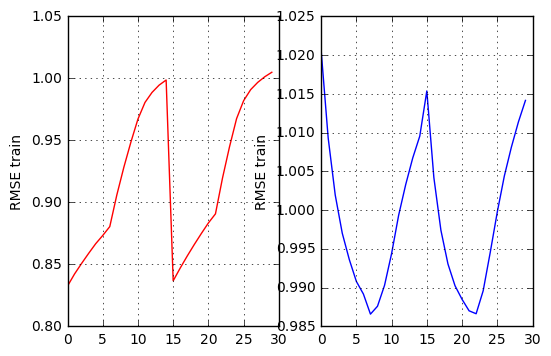

In [32]:

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(rmse_train_array, color='red')
#ax1.set_xlabel("number of features")
ax1.set_ylabel("RMSE train")
ax1.grid()
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(rmse_test_array, color='blue')
#ax1.set_xlabel("number of features")
ax2.set_ylabel("RMSE train")
ax2.grid()
plt.show()


## Submission

In [21]:
predictions=full_item_features.T @ full_user_features
print(test.sum()/test.nnz)
print(np.mean(predictions))
#predictions=predictions+(test.sum()/test.nnz-np.mean(predictions))

3.85695079553
3.36726441673


In [22]:
from helpers import read_txt,deal_line
import csv

# UNTESTED

def create_submission_csv(predictions,sample_submission_filename, submission_filename):
    sample_data = read_txt(sample_submission_filename)[1:]
    sample_data = [deal_line(line) for line in sample_data]
    with open(submission_filename, 'w') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for user,item,fake_rating in sample_data:
            writer.writerow({'Id': "r{}_c{}".format(user,item), 'Prediction': predictions[item-1,user-1]})
        #WARNING NEW LINE IN OUPTU FILE
create_submission_csv(predictions,"../Data/sampleSubmission.csv","./submission.csv")